# Teoría cuántica básica, Observables y Medidas

## Simule el primer sistema cuántico descrito en la sección 4.1.

### El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.
### 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.


In [7]:
import numpy as np
def probabilidad_posicion(estado, posicion):
   norm = np.sum(np.abs(estado)**2)
   return np.abs(estado[posicion])**2 / norm
psi = np.array([complex(-3, -1), complex(0, -2), complex(0, 1), complex(2, 0)])
print("Probabilidad en la posición 2:", probabilidad_posicion(psi, 2))

Probabilidad en la posición 2: 0.05263157894736842


### 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [24]:
import numpy as np
def normalizado(v):
   norma = np.linalg.norm(v) 
   return v / norma
def probabilidad_transicion(psi, phi):
   npsi = normalizado(psi)
   nphi = normalizado(phi)
   producto_interno = np.vdot(npsi, nphi)
   return np.abs(producto_interno)**2

psi = np.array([1, 2j])
phi = np.array([3, 4j])
print("Probabilidad de transición:", probabilidad_transicion(psi, phi))

Probabilidad de transición: 0.9680000000000002


## Complete los retos de programación del capítulo 4.

### 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación



In [27]:
import numpy as np
def normalizado(v):
    norma = np.linalg.norm(v) 
    return v / norma
def amplitud(psi, phi):
    npsi = normalizado(psi)
    nphi = normalizado(phi)
    producto_interno = np.vdot(npsi, nphi)
    prob=probabilidad_transicion(producto_interno)
    return prob
def probabilidad_transicion(amplitud):
    return np.abs(amplitud)**2

psi = np.array([1, 2j])
phi = np.array([3, 4j])
print("Probabilidad de transición:", amplitud(psi, phi))

Probabilidad de transición: 0.9680000000000002


### 2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.


In [32]:
import numpy as np
def normalizado(v):
    norma = np.linalg.norm(v) 
    return v / norma

def es_hermitiana(matriz):
    return np.allclose(matriz, np.conjugate(matriz.T))

def media(observable, ket):
    bra = np.conjugate(ket.T)
    return np.vdot(bra, np.dot(observable, ket))

def varianza_observable(observable, ket):
    valor_medio = media(observable, ket)
    observable_cuadrado = np.dot(observable, observable)
    valor_medio_cuadrado = media(observable_cuadrado, ket)
    return valor_medio_cuadrado - valor_medio**2

def main():
    observable = np.array([[1, 1j],[-1j, -1]])
    estado = np.array([1, 2j])
    nestado= normalizado(estado)
    if es_hermitiana(observable):
        print("La matriz es hermitiana")
        med = media(observable, nestado)
        varianza = varianza_observable(observable, nestado)
        print("Media del observable:", med)
        print("Varianza del observable:", varianza)
    else:
        print("La matriz no es hermitiana")
main()

La matriz es hermitiana
Media del observable: (1+0j)
Varianza del observable: (-2.2+0j)



### 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.


In [1]:
import numpy as np

def normalizado(v):
    norma = np.linalg.norm(v) 
    return v / norma

def es_hermitiana(matriz):
    return np.allclose(matriz, np.conjugate(matriz.T))

def valores_propios_observable(observable):
    if not es_hermitiana(observable):
        raise ValueError("La matriz no es hermitiana. No se puede considerar como un observable.")
    valores_propios, vectores_propios = np.linalg.eigh(observable)
    return valores_propios, vectores_propios

def probabilidad_transicion_a_vpropios(estado, vectores_propios):
    probabilidades = []
    vectores_norm = [normalizado(vector_propio) for vector_propio in vectores_propios]
    for nvector_propio in vectores_norm:
        probabilidad = np.abs(np.dot(estado.conj(), nvector_propio))**2
        probabilidades.append(probabilidad)
    return probabilidades

observable = np.array([[1, 1j],[-1j, -1]])
estado = np.array([1, 2j])
nestado = normalizado(estado)

try:
    valores_propios, vectores_propios = valores_propios_observable(observable)
    probabilidades = probabilidad_transicion_a_vpropios(nestado, vectores_propios)
    probabilidades_float = list(map(float, probabilidades))
    print("Valores propios del observable:", valores_propios)
    print("Probabilidades de transitar a los vectores propios:", probabilidades_float)
except ValueError as e:
    print(e)

Valores propios del observable: [-1.41421356  1.41421356]
Probabilidades de transitar a los vectores propios: [0.7121320343559642, 0.2878679656440358]



### 4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [45]:
def estado_final(matrices_unitarias, estado_inicial):
    estado = estado_inicial
    for U in matrices_unitarias:
        estado = np.dot(U, estado)
    return estado


U1 = np.array([[0, 1], [1, 0]])
U2 = (1 / np.sqrt(2)) * np.array([[1, 1],[1, -1]])
estado_inicial = np.array([1, 0])
estado_final = estado_final([U1, U2], estado_inicial)
print("Estado final después de la evolución:", estado_final)


Estado final después de la evolución: [ 0.70710678 -0.70710678]


## Realice los siguientes problemas e incluyalos como ejemplos

### Modele en su librería los problemas
### 4.3.1
![image1](images/4.3.1.jpg)

In [47]:
import numpy as np
spin_up = np.array([1, 0])
spin_down = np.array([0, 1])
Sx = 0.5 * np.array([[0, 1], [1, 0]])

resulting_state = np.dot(Sx, spin_up)
spin_up_x = (1/np.sqrt(2)) * (spin_up + spin_down)
spin_down_x = (1/np.sqrt(2)) * (spin_up - spin_down)
prob_up_x = np.abs(np.dot(spin_up_x.conj(), resulting_state))**2
prob_down_x = np.abs(np.dot(spin_down_x.conj(), resulting_state))**2

print("Estado resultante después de aplicar Sx al estado spin up:")
print(resulting_state)

print("\nPosibles estados después de la medición:")
print("|spin up> =", spin_up_x)
print("|spin down> =", spin_down_x)


Estado resultante después de aplicar Sx al estado spin up:
[0.  0.5]

Posibles estados después de la medición:
|spin up> = [0.70710678 0.70710678]
|spin down> = [ 0.70710678 -0.70710678]


### 4.3.2
![image2](images/4.3.2.jpg)

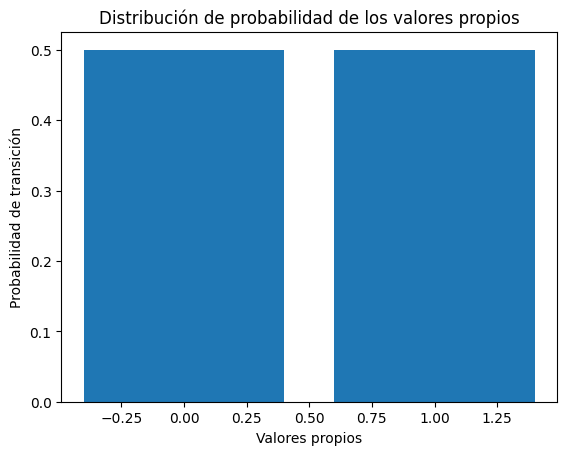

In [53]:
import numpy as np
import matplotlib.pyplot as plt

estado_spin_arriba = np.array([1, 0])
Sx = 0.5 * np.array([[0, 1], [1, 0]])
nEstado=normalizado(estado_spin_arriba)
valores_propios, vectores_propios = np.linalg.eig(Sx)

def normalizado(v):
    norma = np.linalg.norm(v) 
    return v / norma
probabilidades = []
for vector_propio in vectores_propios.T:
    nvector_propio=normalizado(vector_propio)
    probabilidad = np.abs(np.dot(nEstado.conj(), nvector_propio))**2
    probabilidades.append(probabilidad)

# Graficar la distribución de probabilidad de transición
plt.bar(range(len(valores_propios)), probabilidades)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad de transición')
plt.title('Distribución de probabilidad de los valores propios')
plt.show()



### 4.4.1
![image3](images/4.4.1.jpg)


In [54]:
import numpy as np

U1 = np.array([[0, 1],
              [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
              [np.sqrt(2)/2, -np.sqrt(2)/2]])

def es_unitaria(matriz):
    adjunta = np.conjugate(matriz.T)
    producto = np.dot(adjunta, matriz)
    identidad = np.eye(matriz.shape[0])
    if np.allclose(producto, identidad):
        return True
    else:
        return False

print("U1 es unitaria:", es_unitaria(U1))
print("U2 es unitaria:", es_unitaria(U2))

producto = np.dot(U1, U2)

print("El producto de U1 y U2 es unitario:", es_unitaria(producto))

U1 es unitaria: True
U2 es unitaria: True
El producto de U1 y U2 es unitario: True


### 4.4.2
![image1](images/4.4.2.jpg)

In [59]:
import numpy as np

M = np.array([[0  ,1/np.sqrt(2)  ,1/np.sqrt(2)  ,0], 
              [1j/np.sqrt(2),0   ,0  ,1/np.sqrt(2)], 
              [1/np.sqrt(2)  ,0  ,0  ,1j/np.sqrt(2)],
              [0  ,1/np.sqrt(2)  ,-1/np.sqrt(2)  ,0]])

estado_inicial = np.array([1, 0, 0, 0])
punto_1 = np.dot(M, estado_inicial)
punto_2 = np.dot(M, punto_1)
estado_final = np.dot(M, punto_2)
probabilidad_punto_3 = np.abs(estado_final[2])**2

print("Estado final del sistema:", estado_final)
print("Probabilidad de encontrar la bola en el punto 3:", probabilidad_punto_3)


Estado final del sistema: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola en el punto 3: 0.0
